# Comparison of KF2, KF3, KF4, KF4d Kalman Filter algorithms

A high-speed IBG (IMU + Baro+GPS) data log `ms5611_datalog` was recorded and later downloaded for this scenario : the gps-vario was initially on the floor next to a table, then raised, lowered nearly to the floor, raised and then lowered to the table. The gps-vario is stationary for a few seconds at the beginnning and at the end.

An IBG data log contains IMU AHRS data recorded at 500 samples/sec, Baro z-altitude data at 50 samples/sec and (if available) GPS data at 10 samples/sec. 

This sample log was obtained indoors without GPS reception as we are only interested in testing the Kalman Filtering algorithms that uses altitude and gravity-compensated acceleration data to estimate altitude and climb/sink rate.

An MS5611 barometric pressure sensor and MPU9250 9-DOF IMU generated the sensor data. 

Note that absolute results (e.g. Covariance matrix uncertainty convergence) will differ depending on the static configuration options used (see the file `config.h`). 

However, the relative performance of the different algorithms will still track the differences shown here.

The offline algorithm comparison code was compiled and executed in an Ubuntu 20.04 terminal.

There are 4 algorithm options : -kf2 (use only altitude samples), -kf3 (fuse altitude and acceleration samples),
-kf4 (fuse altitude and acceleration samples), -kf4d (KF4 with dynamic update uncertainty injection depending on detected acceleration magnitude)

To compile the code :
```
g++ -o kf_run kf_run.cpp kalmanfilter2.cpp kalmanfilter3.cpp ../../src/sensor/kalmanfilter4.cpp ../../src/sensor/imu.cpp ../../src/sensor/ringbuf.cpp -I../../src/sensor -I. -lm
```

Run the code 

```
./kf_run -kf2 ./ms5611_datalog > kf2_results.txt
./kf_run -kf3 ./ms5611_datalog > kf3_results.txt
./kf_run -kf4 ./ms5611_datalog > kf4_results.txt
./kf_run -kf4d ./ms5611_datalog > kf4d_results.txt
```

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Load sensor altitude samples, KF2 algorithm filter results

In [2]:
z = []
z_kf2 = []
v_kf2 = []
pzz_kf2 = []
pvv_kf2 = []
with open('kf2_results.txt', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')
    for row in csvreader:
        z.append(float(row[0]))
        z_kf2.append(float(row[1]))
        pzz_kf2.append(float(row[2]))
        v_kf2.append(float(row[3]))
        pvv_kf2.append(float(row[4]))
z = np.array(z)        
z_kf2 = np.array(z_kf2)
v_kf2 = np.array(v_kf2)        
pzz_kf2 = np.array(pzz_kf2)        
pvv_kf2 = np.array(pvv_kf2)        

# Load KF3 algorithm filter results

In [3]:
z_kf3 = []
v_kf3 = []
pzz_kf3 = []
pvv_kf3 = []
with open('kf3_results.txt', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')
    for row in csvreader:
        z_kf3.append(float(row[1]))
        pzz_kf3.append(float(row[2]))
        v_kf3.append(float(row[3]))
        pvv_kf3.append(float(row[4]))
z_kf3 = np.array(z_kf3)
v_kf3 = np.array(v_kf3)        
pzz_kf3 = np.array(pzz_kf3)        
pvv_kf3 = np.array(pvv_kf3)        

# Load KF4 algorithm filter results

In [4]:
z_kf4 = []
v_kf4 = []
pzz_kf4 = []
pvv_kf4 = []
with open('kf4_results.txt', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')
    for row in csvreader:
        z_kf4.append(float(row[1]))
        pzz_kf4.append(float(row[2]))
        v_kf4.append(float(row[3]))
        pvv_kf4.append(float(row[4]))
z_kf4 = np.array(z_kf4)
v_kf4 = np.array(v_kf4)        
pzz_kf4 = np.array(pzz_kf4)        
pvv_kf4 = np.array(pvv_kf4)        

# Load KF4d algorithm filter results

In [5]:
z_kf4d = []
v_kf4d = []
pzz_kf4d = []
pvv_kf4d = []
with open('kf4d_results.txt', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')
    for row in csvreader:
        z_kf4d.append(float(row[1]))
        pzz_kf4d.append(float(row[2]))
        v_kf4d.append(float(row[3]))
        pvv_kf4d.append(float(row[4]))
z_kf4d = np.array(z_kf4d)
v_kf4d = np.array(v_kf4d)        
pzz_kf4d = np.array(pzz_kf4d)        
pvv_kf4d = np.array(pvv_kf4d)  

# Comparison of KF2, KF3, KF4 and KF4d algorithms : Altitude Estimation

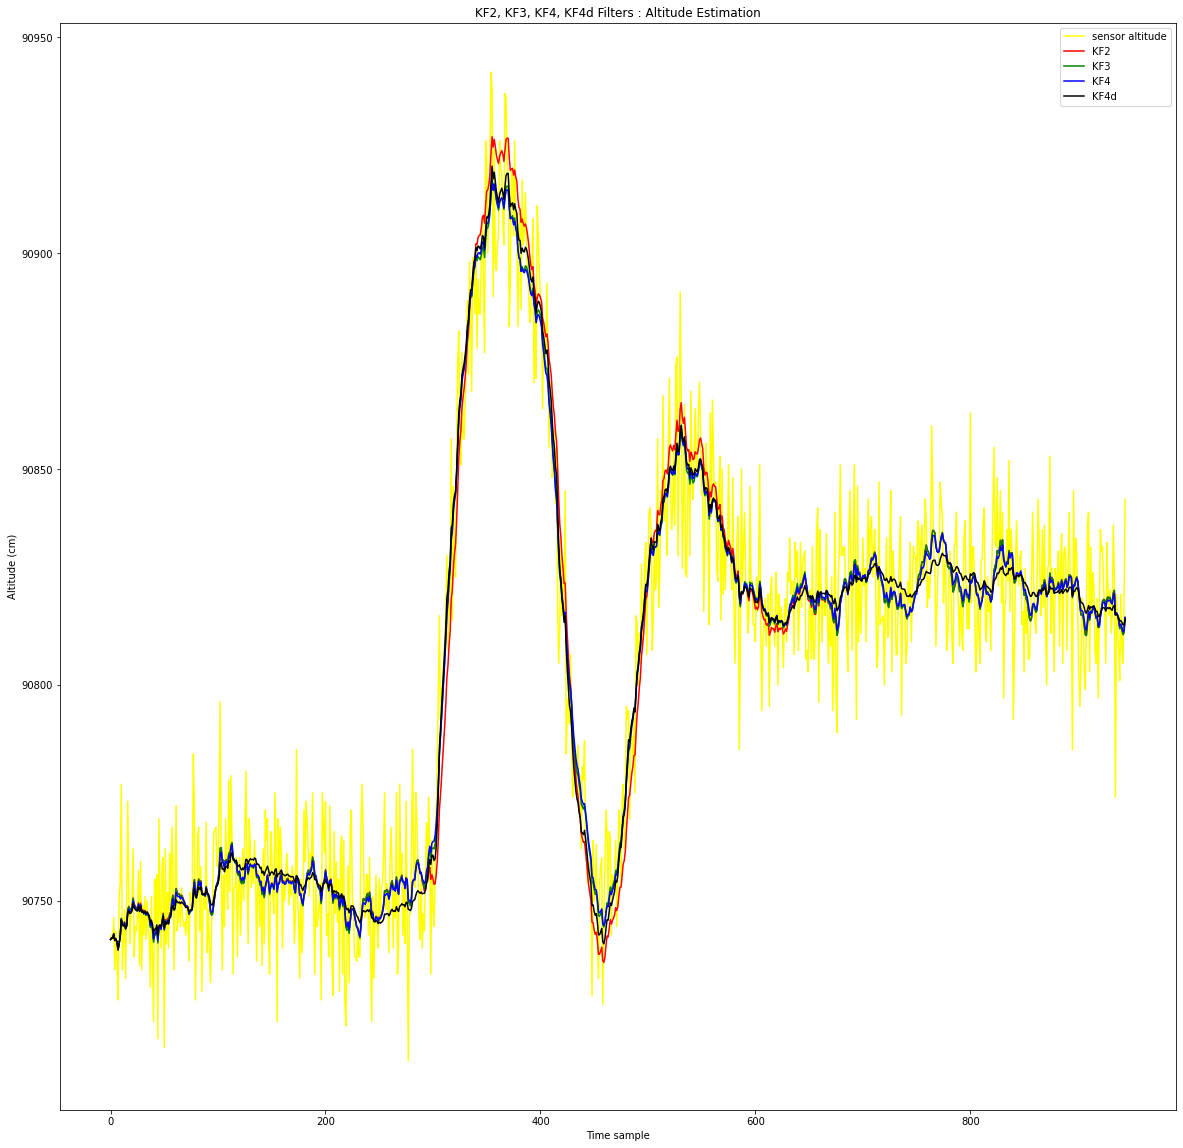

In [13]:
# enlarge the plot size to show more detail
plt.rcParams["figure.figsize"]=20,20

# MS5611 barometric pressure sensor derived altitude samples
plt.plot(z, color='yellow', label='sensor altitude')

# KF2 filter only uses the altitude samples
plt.plot(z_kf2, color='red', label='KF2')

# KF3 filter fuses altitude and gravity-compensated acceleration data
plt.plot(z_kf3, color='green', label='KF3')

# KF4 filter fuses altitude and gravity-compensated acceleration data, acceleration update and acceleration
# bias variance are static configuration options
plt.plot(z_kf4, color='blue', label='KF4')

# KF4d filter fuses altitude and gravity-compensated acceleration data, dynamically adds uncertainty to
# Pvv and Pbb covariance elements in update phase depending on the external acceleration magnitude
plt.plot(z_kf4d, color='black', label='KF4d')

plt.title('KF2, KF3, KF4, KF4d Filters : Altitude Estimation')
plt.legend()
plt.xlabel('Time sample')
plt.ylabel('Altitude (cm)')

plt.show()

Plot a subset of the data for better discrimination

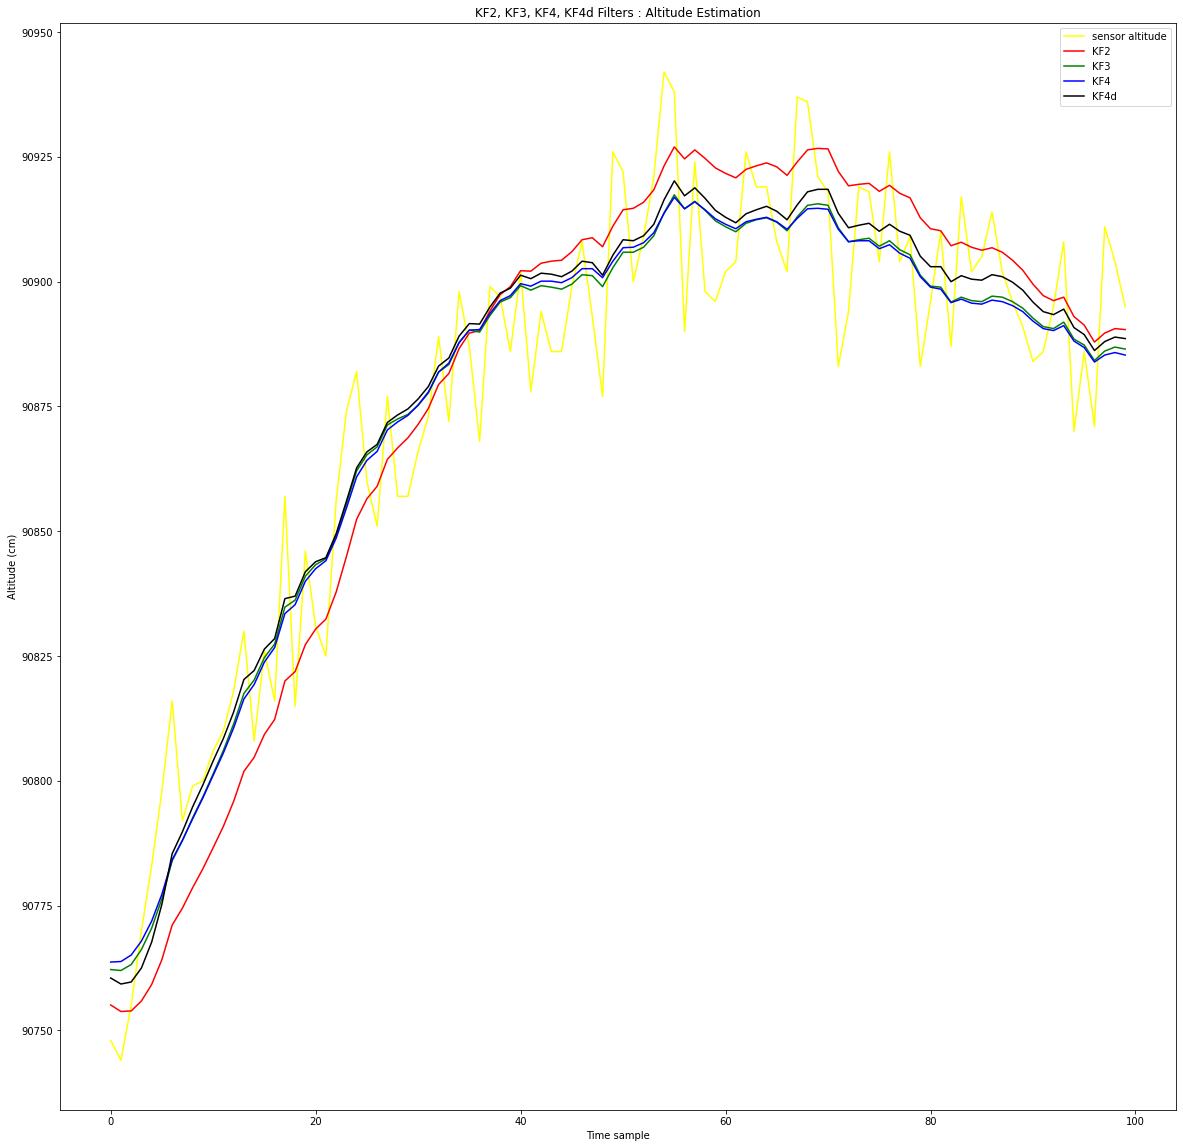

In [7]:
plt.plot(z[300:400], color='yellow', label='sensor altitude')
plt.plot(z_kf2[300:400], color='red', label='KF2')
plt.plot(z_kf3[300:400], color='green', label='KF3')
plt.plot(z_kf4[300:400], color='blue', label='KF4')
plt.plot(z_kf4d[300:400], color='black', label='KF4d')
plt.xlabel('Time sample')
plt.ylabel('Altitude (cm)')
plt.title('KF2, KF3, KF4, KF4d Filters : Altitude Estimation')
plt.legend()
plt.show()

# Comparison of KF2, KF3, KF4 and KF4d algorithms : Velocity estimation

The KF2 filter response lag is visible even without zooming in. The difference is very perceptible for variometer audio feedback. We can also see that the KF4d algorithm does a better job of filtering out noise when the acceleration is close to zero (vario is stationary at beginning and end).

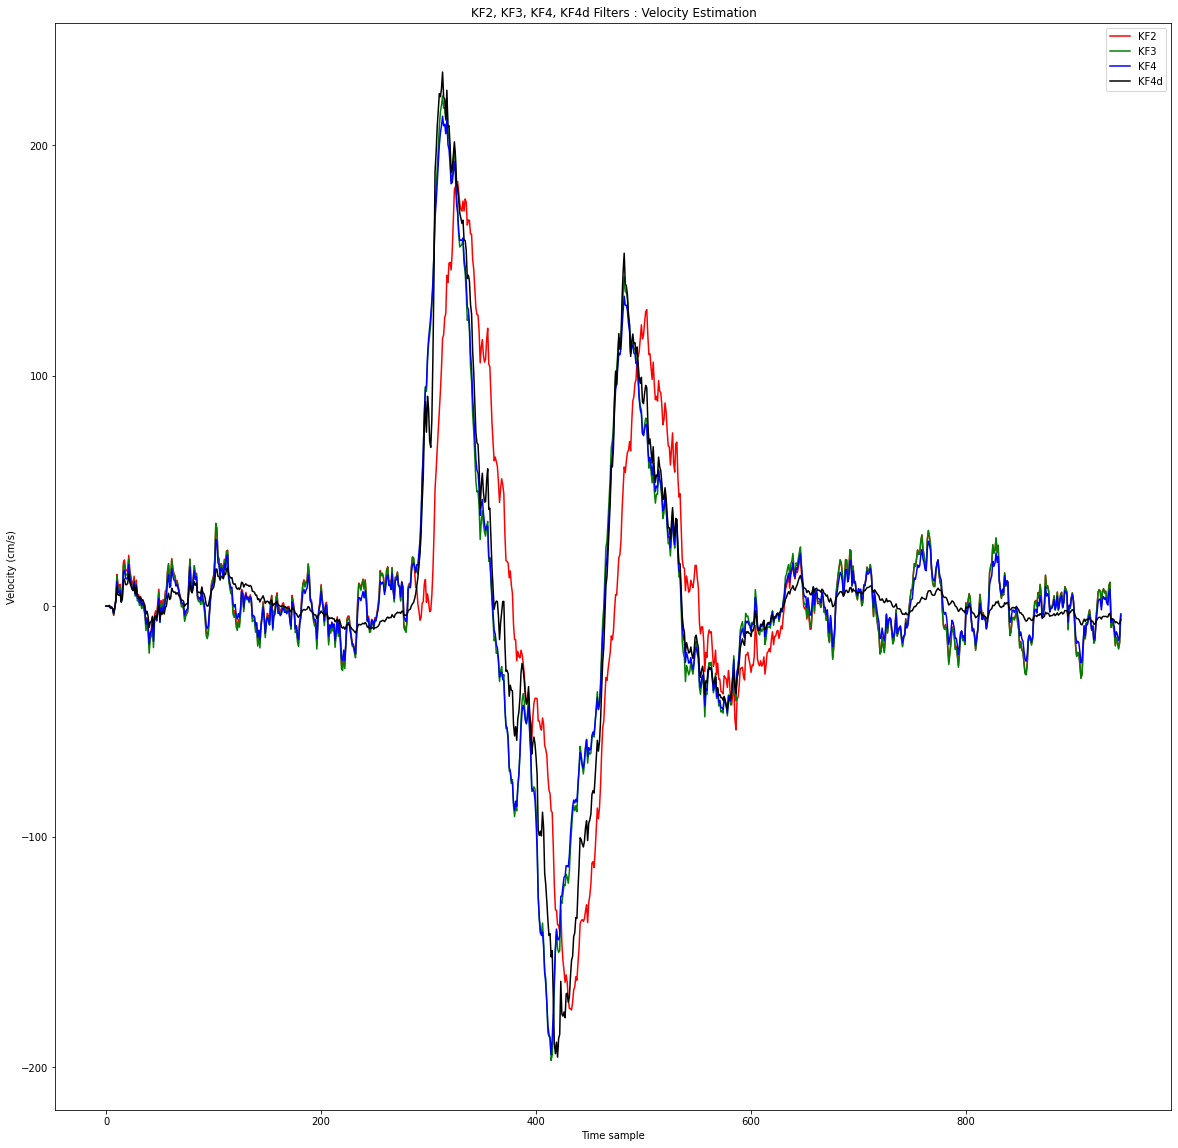

In [8]:
plt.plot(v_kf2, color='red', label='KF2')
plt.plot(v_kf3, color='green', label='KF3')
plt.plot(v_kf4, color='blue', label='KF4')
plt.plot(v_kf4d, color='black', label='KF4d')
plt.title('KF2, KF3, KF4, KF4d Filters : Velocity Estimation')
plt.xlabel('Time sample')
plt.ylabel('Velocity (cm/s)')
plt.legend()
plt.show()

When zoomed in, we can quantify the difference in response. The sample interval is 20mS. KF2 responds to the falling variometer nearly 0.5 seconds later. This demonstrates the benefit of fusing acceleration and altitude readings for minimum-lag variometer response.

The KF4d algorithm matches KF4 for velocity response lag when the acceleration is high, but has a relatively larger lag when the acceleration is low.

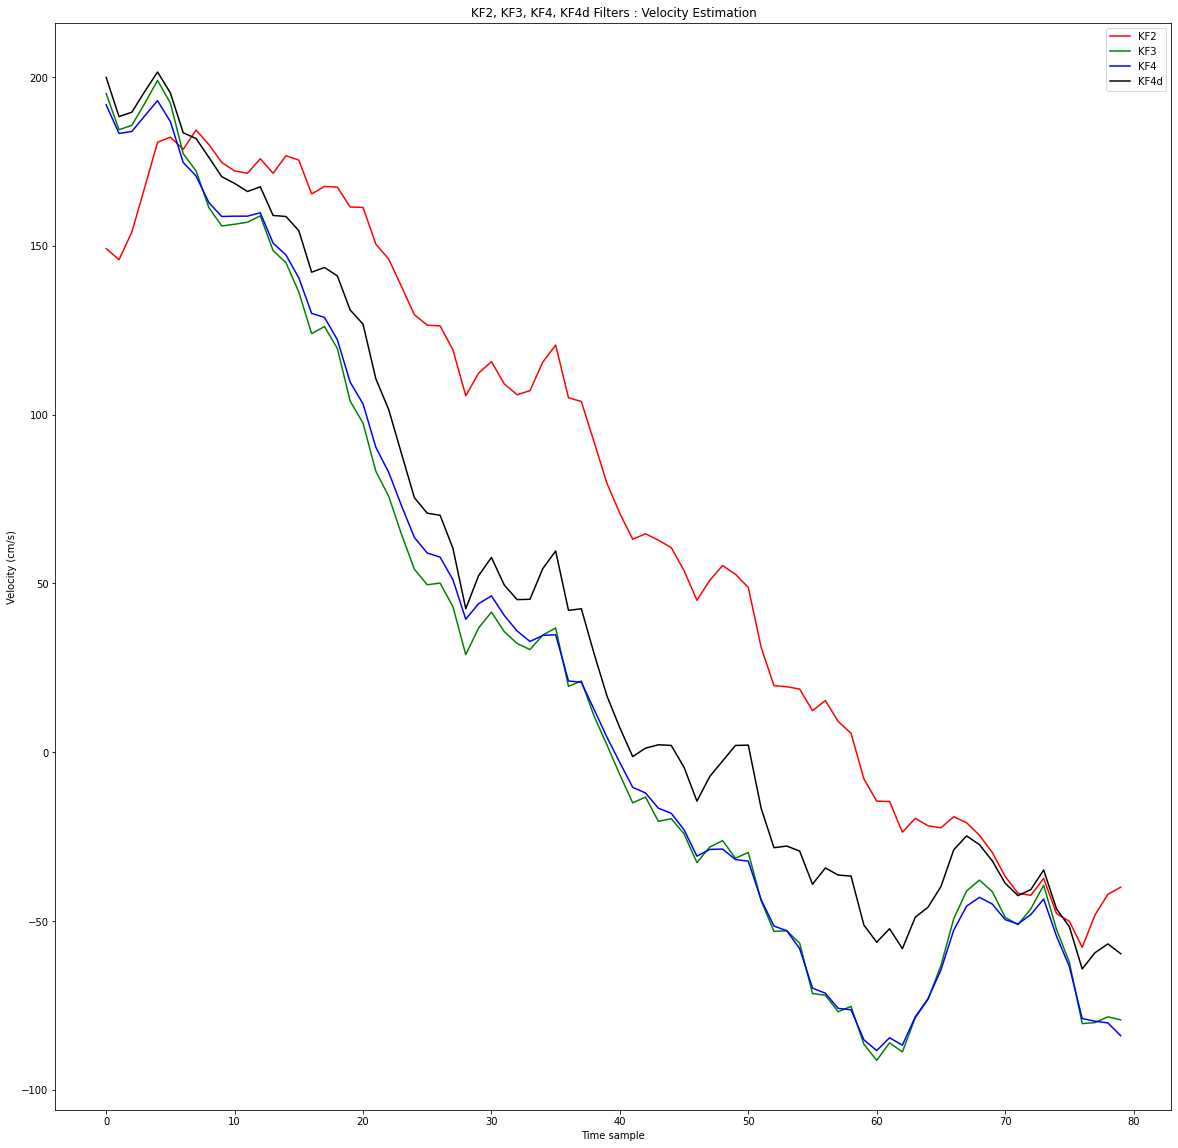

In [9]:
plt.plot(v_kf2[320:400], color='red', label='KF2')
plt.plot(v_kf3[320:400], color='green', label='KF3')
plt.plot(v_kf4[320:400], color='blue', label='KF4')
plt.plot(v_kf4d[320:400], color='black', label='KF4d')
plt.title('KF2, KF3, KF4, KF4d Filters : Velocity Estimation')
plt.xlabel('Time sample')
plt.ylabel('Velocity (cm/s)')
plt.legend()
plt.show()

# Comparison of KF2, KF3, KF4 and KF4d algorithms : Altitude uncertainty (Pzz) convergence

Note that for the KF4d algorithm we are artificially adding uncertainty to the state covariance matrix P elements Pvv and Pbb depending on the magnitude of the acceleration detected. This is the reason for the spikes in the regions where the vario is accelerating or decelerating. 

As a result, we get a fast response to large accelerations while also filtering out noise better when the acceleration magnitude is low, i.e. the vario is stationary or moving with nearly constant velocity.

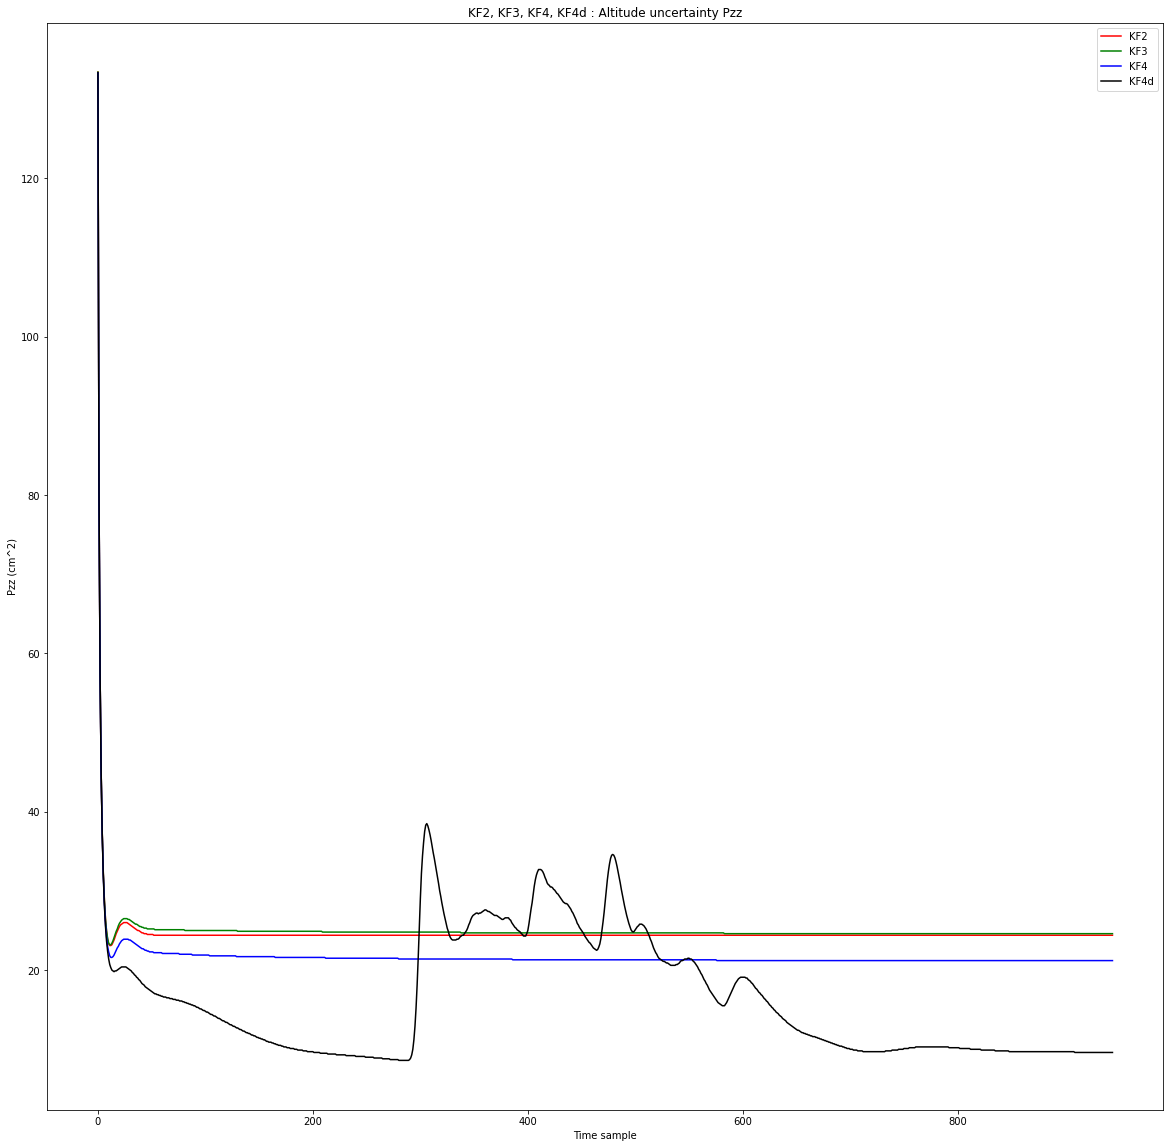

In [10]:
plt.plot(pzz_kf2, color='red', label='KF2')
plt.plot(pzz_kf3, color='green', label='KF3')
plt.plot(pzz_kf4, color='blue', label='KF4')
plt.plot(pzz_kf4d, color='black', label='KF4d')
plt.title('KF2, KF3, KF4, KF4d : Altitude uncertainty Pzz')
plt.xlabel('Time sample')
plt.ylabel('Pzz (cm^2)')
plt.legend()
plt.show()

## Steep drop at start,  re-plot at starting offset 5 to clearly show the difference in converged levels

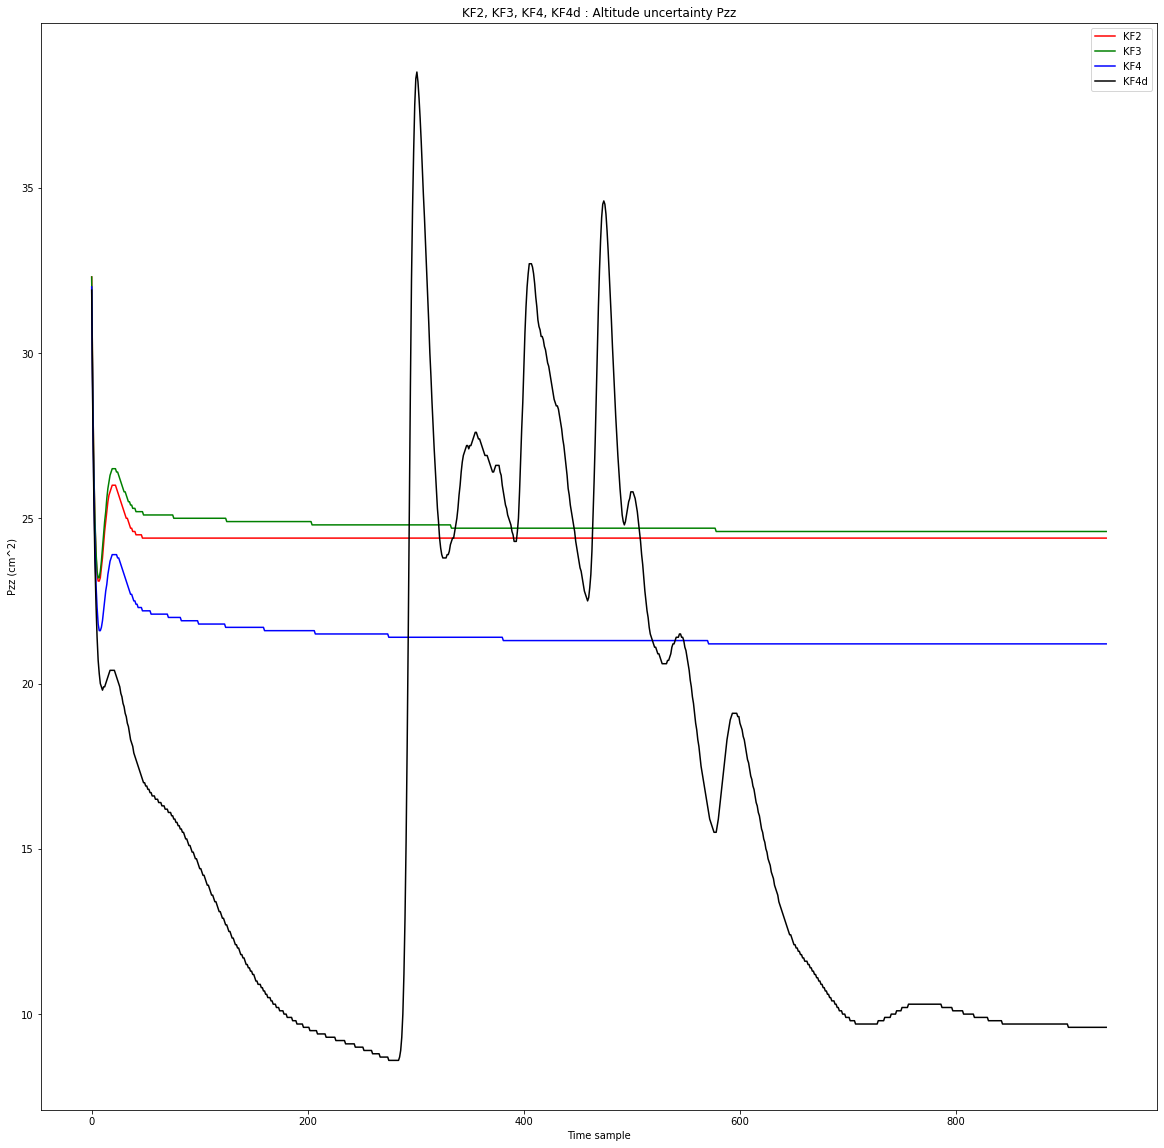

In [11]:
plt.plot(pzz_kf2[5:], color='red', label='KF2')
plt.plot(pzz_kf3[5:], color='green', label='KF3')
plt.plot(pzz_kf4[5:], color='blue', label='KF4')
plt.plot(pzz_kf4d[5:], color='black', label='KF4d')
plt.title('KF2, KF3, KF4, KF4d : Altitude uncertainty Pzz')
plt.xlabel('Time sample')
plt.ylabel('Pzz (cm^2)')
plt.legend()
plt.show()

# Comparison of KF2, KF3, KF4 and KF4d algorithms : Velocity uncertainty (Pvv) convergence

Note that for the KF4d algorithm we are artificially adding uncertainty to the covariance matrix P elements Pvv and Pbb depending on the magnitude of the detected acceleration. This is the reason for the spikes in the regions where the vario is accelerating or decelerating. 

As a result, we get a fast response to large accelerations while also filtering out noise better when the acceleration magnitude is low, i.e. the vario is stationary or moving with nearly constant velocity.

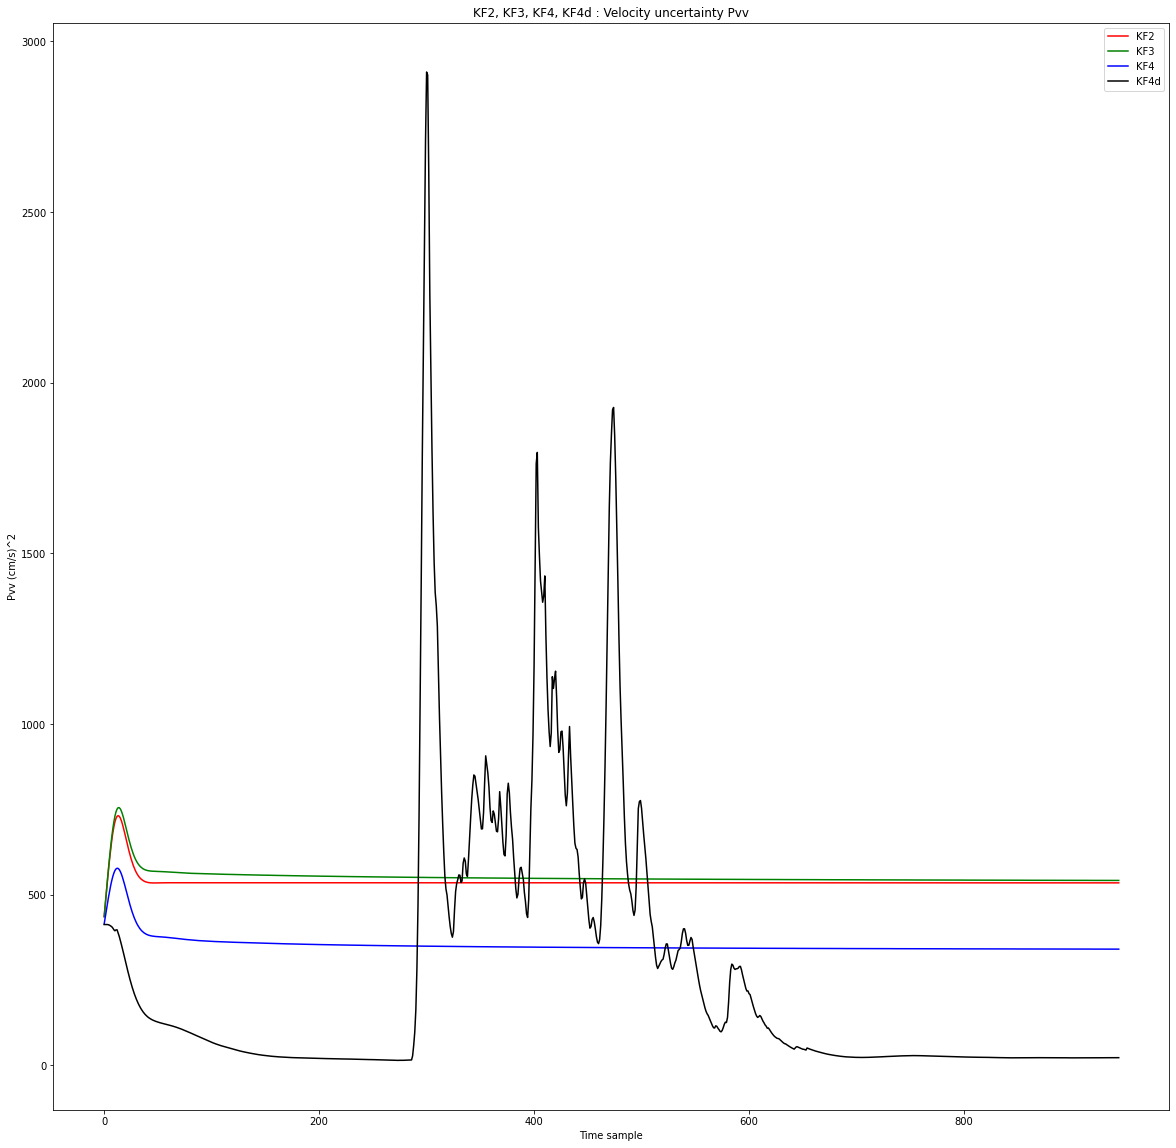

In [12]:
plt.plot(pvv_kf2, color='red', label='KF2')
plt.plot(pvv_kf3, color='green', label='KF3')
plt.plot(pvv_kf4, color='blue', label='KF4')
plt.plot(pvv_kf4d, color='black', label='KF4d')
plt.xlabel('Time sample')
plt.ylabel('Pvv (cm/s)^2')
plt.title('KF2, KF3, KF4, KF4d : Velocity uncertainty Pvv')
plt.legend()
plt.show()

# Pzz and Pvv at end of run (vario stationary)

|  | Pzz | Pvv |
| --- | --- | --- |
| KF2 | 24.4 | 535.0|
| KF3 | 24.6  | 542.1 |
| KF4 | 21.2 | 340.8 |
| KF4d | 9.6 | 22.8 |

The KF4d algorithm with dynamic accel/bias uncertainty injection has significantly lower climb/sinkrate uncertainty when the vario is at rest or moving with near constant velocity. 

In terms of variometer audio feedback, there is perceptibly less jitter when the vario is stationary or moving with nearly constant velocity. 

The trade-off is that for low accelerations/decelerations, there is a slight delay in response compared to the KF4 algorithm. For large accelerations, the KF4d response is on par with KF4d.

KF4d is my preferred algorithm option for variometer response.